<a href="https://colab.research.google.com/github/umas-iit/Algorithms/blob/main/CS304_AI_Random_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step #1 Load the Data

In [12]:
# A tutorial for this file is available at www.relataly.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm

# Source:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Load train and test datasets
path = "https://raw.githubusercontent.com/flo7up/relataly_data/main/house_prices/train.csv"
df = pd.read_csv(path)
print(df.columns)
df.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step #2 Explore the Data

### let’s quickly first explore the data. A distribution plot can help us understand our dataset’s frequency of regression values.

Text(0.5, 1.0, 'Sale Price Distribution')

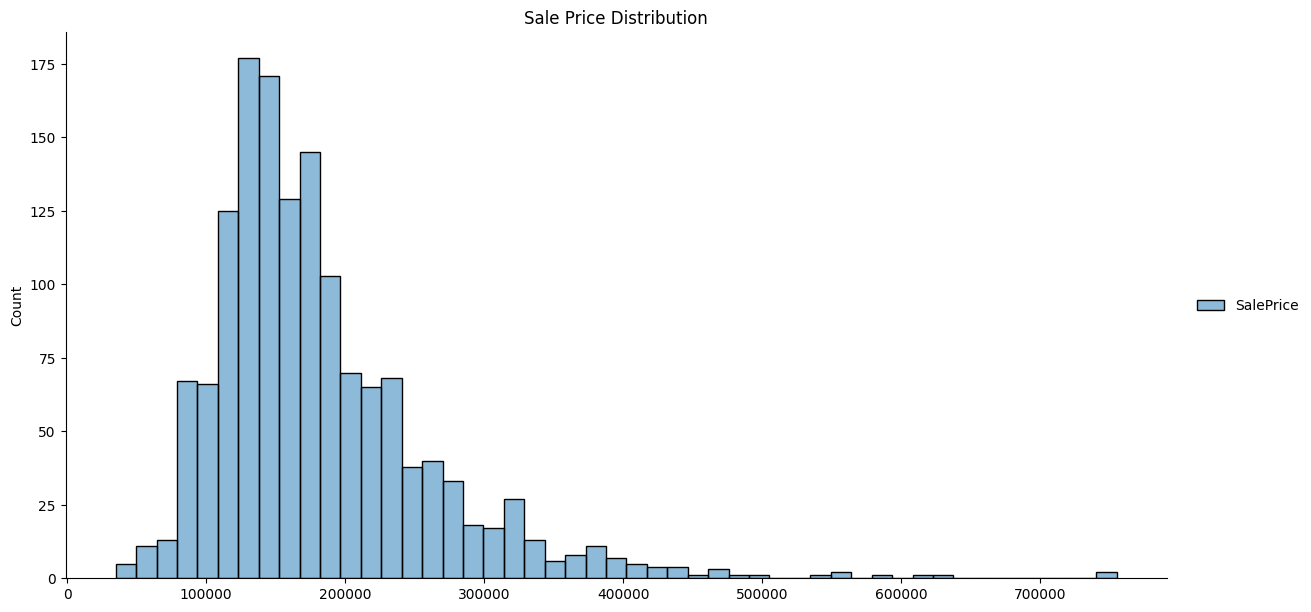

In [2]:
# Create histograms for feature columns separated by prediction label value
ax = sns.displot(data=df[['SalePrice']].dropna(), height=6, aspect=2)
plt.title('Sale Price Distribution')

For feature selection, it is helpful to understand the predictive power of the different variables in a dataset.
* Use scatterplots to estimate the predictive power of specific features.
* Running the code below will create a scatterplot that visualizes the relation between the sale price, lot area, and the house’s overall quality.
* scatterplot shows that the sale price increases with the overall quality. On the other hand, the LotArea has only a minor effect on the sale price

## Step #3 Data Preprocessing


 * prepare the data for use as input to train a regression model.
 * reduce the number of variables and use only a small set of features.
 * encode categorical variables with integer dummy values.
 * ensure that regression model does not know the target variable,separate house price (y) from features (x).
 * Finally, split the data into separate datasets for training and testing. The result is four different data sets: x_train, y_train, x_test, and y_test.

In [3]:
def preprocessFeatures(df):
    # Define a list of relevant features
    feature_list = ['SalePrice', 'OverallQual', 'Utilities', 'GarageArea', 'LotArea', 'OverallCond']
    df_dummy = pd.get_dummies(df[feature_list])
    # Cleanse records with na values
    #df_prep = df_prep.dropna()
    return df_dummy

df_base = preprocessFeatures(df)

# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split( df_base.copy(), df_base['SalePrice'].copy(), train_size=0.7, random_state=0)
x_train

,SalePrice,OverallQual,GarageArea,LotArea,OverallCond,Utilities_AllPub,Utilities_NoSeWa
682,173000,6,431,2887,5,1,0
960,116500,5,0,7207,7,1,0
1384,105000,6,280,9060,5,1,0
1100,60000,2,246,8400,5,1,0
416,149500,6,440,7844,7,1,0
...,...,...,...,...,...,...,...
763,337000,8,856,9430,5,1,0
835,128000,4,436,9600,7,1,0
1216,112000,6,539,8930,5,1,0
559,234000,7,420,3196,5,1,0


## Step #4 Train Different Regression Models using Random Search

* train the random decision forest regressor.
*  first define a dictionary with different parameter ranges.
* define the number of model variants (n) that the algorithm should try.
* The random search algorithm then selects n random permutations from the grid and uses them to train the model.

Use the RandomSearchCV algorithm from the scikit-learn package.
 * The “CV” in the function name stands for cross-validation. Cross-validation involves splitting the data into subsets (folds) and rotating them between training and validation runs. * each model is trained and tested multiple times on different data partitions.
 * When the search algorithm finally evaluates the model configuration, it summarizes these results into a test score.

* Use a Random Decision Forest – a robust machine learning algorithm that can handle classification and regression tasks. * As a so-called ensemble model, the Random Forest considers predictions from a set of multiple independent estimators.
* The estimator is an important parameter to pass to the RandomSearchCV function. Random decision forests have several hyperparameters that we can use to influence their behavior. We define the following parameter ranges:

* max_leaf_nodes = [2, 3, 4, 5, 6, 7]
* min_samples_split = [5, 10, 20, 50]
* max_depth = [5,10,15,20]
* max_features = [3,4,5]
* n_estimators = [50, 100, 200]
These parameter ranges define the search space from which the randomized search algorithm (RandomSearchCV) will select random configurations.

In [13]:
# Define the Estimator and the Parameter Ranges
dt = RandomForestRegressor()
number_of_iterations = 20
max_leaf_nodes = [2, 3, 4, 5, 6, 7]
min_samples_split = [5, 10, 20, 50]
max_depth = [5,10,15,20]
max_features = [3,4,5]
n_estimators = [50, 100, 200]

# Define the param distribution dictionary
param_distributions = dict(max_leaf_nodes=max_leaf_nodes,
                           min_samples_split=min_samples_split,
                           max_depth=max_depth,
                           max_features=max_features,
                           n_estimators=n_estimators)

# Build the gridsearch
grid = RandomizedSearchCV(estimator=dt,
                          param_distributions=param_distributions,
                          n_iter=number_of_iterations,
                          cv = 5)

grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best params: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

Best params: [0.84647817 0.89952053 0.93265272 0.67045735 0.87780228 0.9633071
 0.83132777 0.81806719 0.81327528 0.89941308 0.94767964 0.66217338
 0.91389184 0.78718589 0.91498228 0.6688284  0.7819803  0.91405877
 0.89949448 0.88103063], using {'n_estimators': 50, 'min_samples_split': 5, 'max_leaf_nodes': 7, 'max_features': 5, 'max_depth': 20}


## These are the five best models and their respective hyperparameter configurations

## Step #5 Select the best Model and Measure Performance

Finally, choose the best model from the list using the “best_model” function.
* calculate the MAE and the MAPE to understand how the model performs on the overall test dataset.
* print a comparison between actual sale prices and predicted sale prices

In [14]:
# Select the best Model and Measure Performance
best_model = grid_results.best_estimator_
y_pred = best_model.predict(x_test)
y_df = pd.DataFrame(y_test)
y_df['PredictedPrice']=y_pred
y_df.head()

,SalePrice,PredictedPrice
529,200624,185298.420325
491,133000,128315.177671
459,110000,112971.999967
279,192000,187188.794663
655,88000,102496.763903


## Next, let’s take a look at the classification errors

In [15]:
# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Mean Absolute Percentage Error (MAPE)
MAPE = mean_absolute_percentage_error(y_pred, y_test)
print('Median Absolute Percentage Error (MAPE): ' + str(np.round(MAPE*100, 2)) + ' %')

Mean Absolute Error (MAE): 8912.14
Median Absolute Percentage Error (MAPE): 4.98 %
